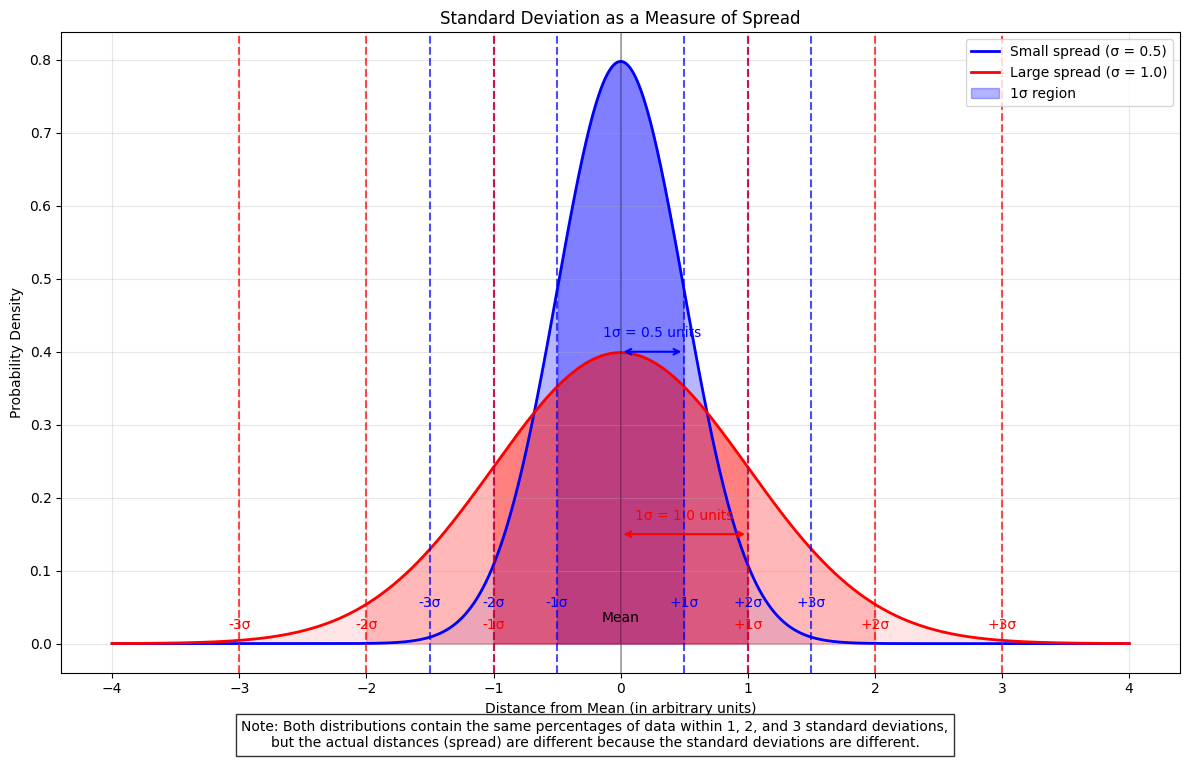

In [ ]:
# Let's create a visualization to show how standard deviation relates to spread
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy import stats

plt.figure(figsize=(12, 8))

# Create x values for our plot
x = np.linspace(-4, 4, 1000)

# Create two normal distributions with different standard deviations
mean = 0
std_small = 0.5  # A small standard deviation
std_large = 1.0  # A larger standard deviation

# Calculate y values for both distributions
y_small = stats.norm.pdf(x, mean, std_small)
y_large = stats.norm.pdf(x, mean, std_large)

# Plot both distributions
plt.plot(x, y_small, 'b-', linewidth=2, label=f'Small spread (σ = {std_small})')
plt.plot(x, y_large, 'r-', linewidth=2, label=f'Large spread (σ = {std_large})')

# Fill regions for small distribution
for i, color, alpha in zip(range(1, 4), ['blue', 'blue', 'blue'], [0.3, 0.2, 0.1]):
    # Calculate the region boundaries
    lower_bound = mean - i * std_small
    upper_bound = mean + i * std_small
    
    # Find the indices in our x array that correspond to these boundaries
    idx_lower = np.searchsorted(x, lower_bound)
    idx_upper = np.searchsorted(x, upper_bound)
    
    # Create the polygon for filling
    x_region = np.concatenate([[lower_bound], x[idx_lower:idx_upper], [upper_bound]])
    y_region = np.concatenate([[0], y_small[idx_lower:idx_upper], [0]])
    
    plt.fill_between(x_region, y_region, color=color, alpha=alpha, 
                     label=f'{i}σ region' if i == 1 else None)
    
    # Add vertical lines
    plt.axvline(x=lower_bound, color=color, linestyle='--', alpha=0.7)
    plt.axvline(x=upper_bound, color=color, linestyle='--', alpha=0.7)
    
    # Label each standard deviation position for small distribution
    plt.text(lower_bound, 0.05, f'-{i}σ', color='blue', ha='center')
    plt.text(upper_bound, 0.05, f'+{i}σ', color='blue', ha='center')

# Fill regions for large distribution
for i, color, alpha in zip(range(1, 4), ['red', 'red', 'red'], [0.3, 0.2, 0.1]):
    # Calculate the region boundaries
    lower_bound = mean - i * std_large
    upper_bound = mean + i * std_large
    
    # Find the indices in our x array that correspond to these boundaries
    idx_lower = np.searchsorted(x, lower_bound)
    idx_upper = np.searchsorted(x, upper_bound)
    
    # Create the polygon for filling
    x_region = np.concatenate([[lower_bound], x[idx_lower:idx_upper], [upper_bound]])
    y_region = np.concatenate([[0], y_large[idx_lower:idx_upper], [0]])
    
    plt.fill_between(x_region, y_region, color=color, alpha=alpha)
    
    # Add vertical lines
    plt.axvline(x=lower_bound, color=color, linestyle='--', alpha=0.7)
    plt.axvline(x=upper_bound, color=color, linestyle='--', alpha=0.7)
    
    # Label each standard deviation position for large distribution
    plt.text(lower_bound, 0.02, f'-{i}σ', color='red', ha='center')
    plt.text(upper_bound, 0.02, f'+{i}σ', color='red', ha='center')

# Add annotations to show actual distances
plt.annotate('', xy=(std_small, 0.4), xytext=(0, 0.4),
             arrowprops=dict(arrowstyle='<->', color='blue', lw=1.5))
plt.text(std_small/2, 0.42, f'1σ = {std_small} units', color='blue', ha='center')

plt.annotate('', xy=(std_large, 0.15), xytext=(0, 0.15),
             arrowprops=dict(arrowstyle='<->', color='red', lw=1.5))
plt.text(std_large/2, 0.17, f'1σ = {std_large} units', color='red', ha='center')

# Add labels and title
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.text(0, 0.03, 'Mean', ha='center')
plt.xlabel('Distance from Mean (in arbitrary units)')
plt.ylabel('Probability Density')
plt.title('Standard Deviation as a Measure of Spread')
plt.legend()
plt.grid(alpha=0.3)

# Add text explanation
plt.figtext(0.5, 0.01, 
            "Note: Both distributions contain the same percentages of data within 1, 2, and 3 standard deviations,\n" +
            "but the actual distances (spread) are different because the standard deviations are different.",
            ha='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Understanding Standard Deviation and Spread

Your question touches on a fundamental concept in statistics. Let me clarify how standard deviation relates to the "spread" and why we talk about tails being "3 standard deviations away":

### Standard Deviation IS the Measure of Spread

Standard deviation (σ) is indeed **the primary measure of spread** in a distribution. It tells us about the typical distance of data points from the mean. A larger standard deviation indicates data is more spread out; a smaller one indicates data is clustered closer to the mean.

### Why We Use "Number of Standard Deviations" to Describe Tails

When we say "3 standard deviations away from the mean," we're using the standard deviation as a **unit of measurement** for distance from the mean. Here's why:

1. **Standardized Measurement**: By measuring distance in terms of standard deviations (rather than absolute units), we can compare positions across different datasets.

2. **Relative Position**: A value that is 3 standard deviations away from the mean is in the extreme tail of the distribution, regardless of whether the standard deviation itself is large or small.

### Visualizing with an Example:

Imagine two normal distributions:
- Distribution A: Mean = 100, Standard Deviation = 5
- Distribution B: Mean = 100, Standard Deviation = 15

In Distribution A:
- 1 standard deviation range: 95-105
- 2 standard deviations range: 90-110
- 3 standard deviations range: 85-115

In Distribution B:
- 1 standard deviation range: 85-115
- 2 standard deviations range: 70-130
- 3 standard deviations range: 55-145

Even though these distributions have different spreads (B is much more spread out than A), in both cases:
- About 68% of data falls within 1 standard deviation
- About 95% of data falls within 2 standard deviations
- About 99.7% of data falls within 3 standard deviations

The **absolute width** of these ranges differs, but the **percentage of data** contained in each is the same.

### Think of it as "How Many Typical Deviations Away"

When we say "3 standard deviations from the mean," we're saying "3 times the typical deviation." It's like saying something is "3 times the normal distance from average."

Let's visualize this concept:

## Do All Bell Curves Follow the 68-95-99.7 Rule?

Yes, the 68-95-99.7 rule applies specifically to any **true normal distribution**, regardless of its mean or standard deviation. This is a fundamental property of the normal distribution's mathematical definition.

### Key Points:

1. **All Normal Distributions**: Every normal distribution, regardless of its parameters (mean and standard deviation), will have approximately:
   - 68% of data within ±1 standard deviation
   - 95% of data within ±2 standard deviations
   - 99.7% of data within ±3 standard deviations

2. **Not All Bell-Shaped Curves**: Not every distribution that looks bell-shaped is a true normal distribution. Many other distributions (t-distribution, logistic distribution, etc.) have bell-shaped curves but different proportions of data within each standard deviation range.

3. **Real-World Data**: Real-world data rarely follows a perfect normal distribution:
   - Manufacturing processes (like our ball bearings) often approximate normal distributions
   - Biological measurements often show some skewness
   - Financial data typically has "fat tails" (more extreme values than a normal distribution would predict)

4. **Central Limit Theorem**: Even when individual data points don't follow a normal distribution, the distribution of sample means tends toward normal as sample size increases. This is why normal distributions are so commonly used in statistics.

### Visual Comparison:
For our ball bearing example, we can verify if the data follows this rule by checking what percentage of our simulated values actually fall within these ranges:

For our simulated ball bearings:
Percentage within 1 standard deviation: 68.60% (expected ~68%)
Percentage within 2 standard deviations: 95.60% (expected ~95%)
Percentage within 3 standard deviations: 99.70% (expected ~99.7%)


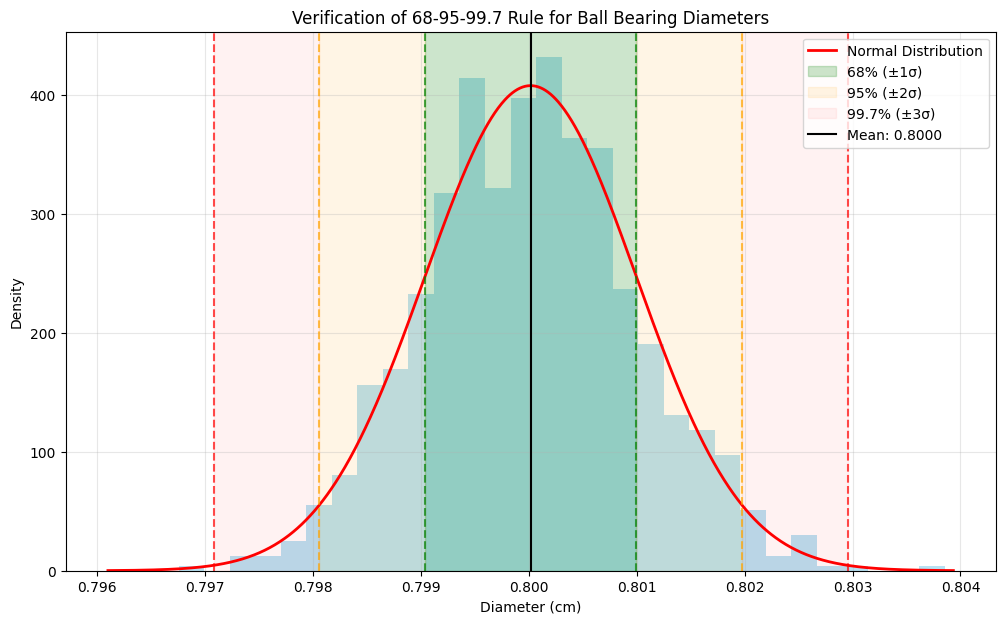

In [ ]:
# Let's verify the 68-95-99.7 rule with our actual data
mean = np.mean(diameters)
std = np.std(diameters)

# Calculate percentages within 1, 2, and 3 standard deviations
within_1_std = np.mean((diameters >= mean - std) & (diameters <= mean + std)) * 100
within_2_std = np.mean((diameters >= mean - 2*std) & (diameters <= mean + 2*std)) * 100
within_3_std = np.mean((diameters >= mean - 3*std) & (diameters <= mean + 3*std)) * 100

print("For our simulated ball bearings:")
print(f"Percentage within 1 standard deviation: {within_1_std:.2f}% (expected ~68%)")
print(f"Percentage within 2 standard deviations: {within_2_std:.2f}% (expected ~95%)")
print(f"Percentage within 3 standard deviations: {within_3_std:.2f}% (expected ~99.7%)")

# Create a more detailed visualization to show the rule
plt.figure(figsize=(12, 7))

# Create the histogram
plt.hist(diameters, bins=30, alpha=0.6, density=True, color='skyblue')

# Plot the theoretical normal distribution curve
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = 1/(std * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * std**2))
plt.plot(x, y, 'r-', linewidth=2, label='Normal Distribution')

# Add vertical lines and colored regions for standard deviations
# 1 standard deviation (68%)
plt.axvline(x=mean - std, color='green', linestyle='--', alpha=0.7)
plt.axvline(x=mean + std, color='green', linestyle='--', alpha=0.7)
plt.axvspan(mean - std, mean + std, alpha=0.2, color='green', label='68% (±1σ)')

# 2 standard deviations (95%)
plt.axvline(x=mean - 2*std, color='orange', linestyle='--', alpha=0.7)
plt.axvline(x=mean + 2*std, color='orange', linestyle='--', alpha=0.7)
plt.axvspan(mean - 2*std, mean - std, alpha=0.1, color='orange')
plt.axvspan(mean + std, mean + 2*std, alpha=0.1, color='orange', label='95% (±2σ)')

# 3 standard deviations (99.7%)
plt.axvline(x=mean - 3*std, color='red', linestyle='--', alpha=0.7)
plt.axvline(x=mean + 3*std, color='red', linestyle='--', alpha=0.7)
plt.axvspan(mean - 3*std, mean - 2*std, alpha=0.05, color='red')
plt.axvspan(mean + 2*std, mean + 3*std, alpha=0.05, color='red', label='99.7% (±3σ)')

# Add mean line
plt.axvline(x=mean, color='black', linestyle='-', label=f'Mean: {mean:.4f}')

plt.title('Verification of 68-95-99.7 Rule for Ball Bearing Diameters')
plt.xlabel('Diameter (cm)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

## Examples of Non-Normal Distributions with Bell-Shaped Curves

While all normal distributions follow the 68-95-99.7 rule, many other distributions have bell-shaped curves but don't follow this exact rule:

1. **Student's t-distribution**: 
   - Similar to normal distribution but with "heavier tails"
   - Less than 68% of data falls within 1 standard deviation
   - Used when sample sizes are small or population standard deviation is unknown

2. **Cauchy distribution**:
   - Looks bell-shaped but has extremely heavy tails
   - Standard deviations aren't defined for this distribution
   - Doesn't follow the 68-95-99.7 rule at all

3. **Logistic distribution**:
   - Bell-shaped but with slightly heavier tails than normal
   - About 73% (not 68%) of data falls within 1 standard deviation

4. **Skewed distributions**:
   - Many real-world distributions are asymmetric (skewed right or left)
   - Still roughly bell-shaped but don't follow the 68-95-99.7 rule

Let's create a simulation to compare a few different distributions:

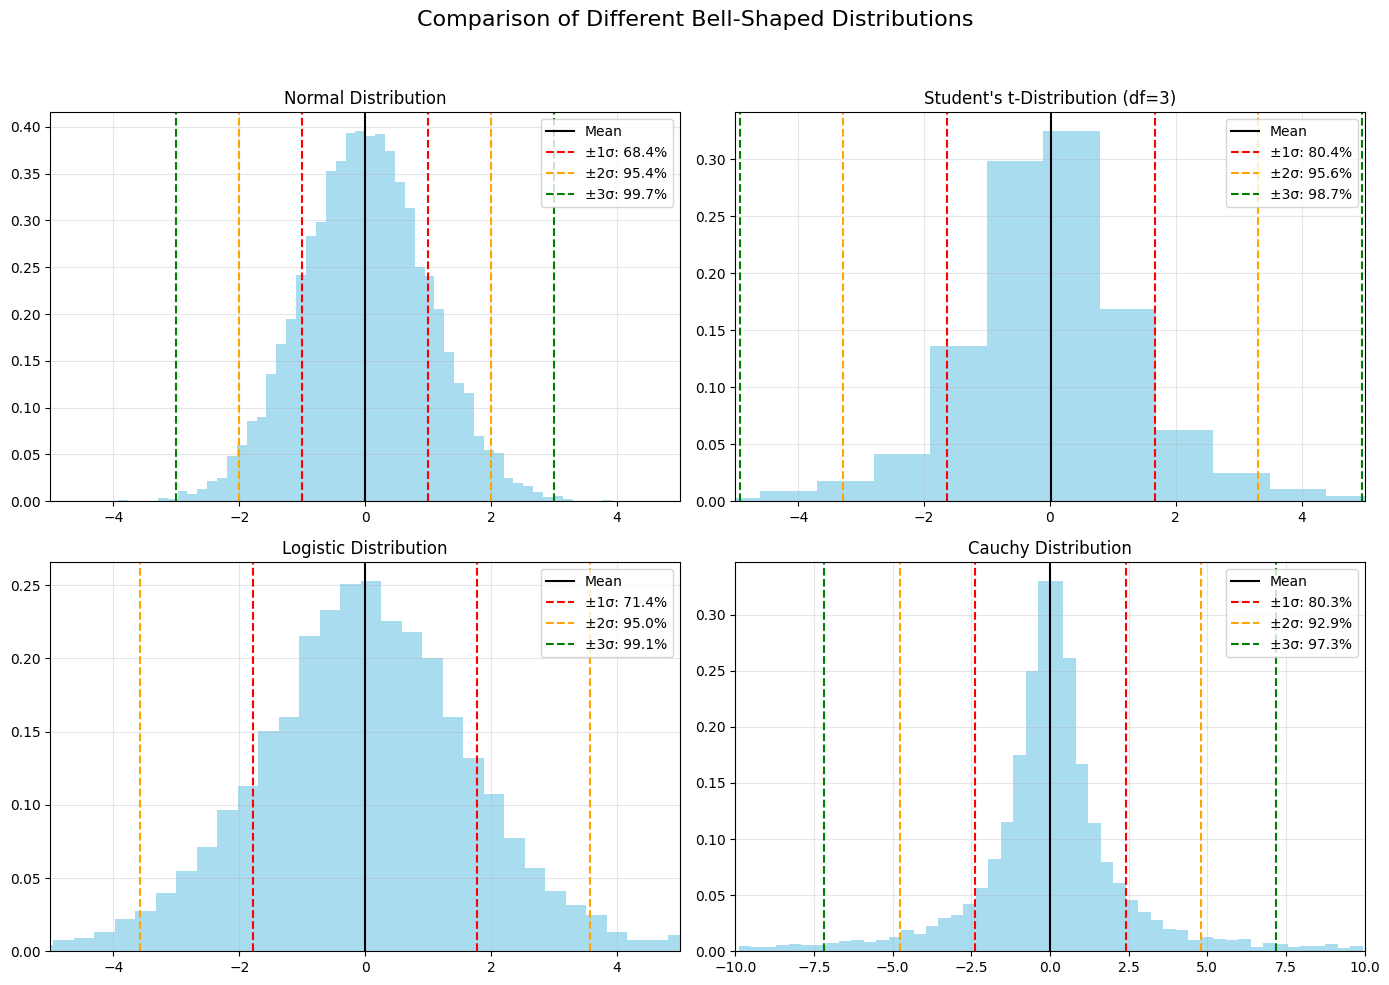

Distribution Comparison - Percentage of data within standard deviations:
--------------------------------------------------------------------------------
Distribution         | ±1σ        | ±2σ        | ±3σ        | Follows 68-95-99.7 Rule? 
--------------------------------------------------------------------------------
Normal               |      68.38% |      95.38% |      99.73% | Yes                      
Student's t (df=3)   |      80.42% |      95.59% |      98.72% | No (heavier tails)       
Logistic             |      71.41% |      94.99% |      99.05% | No                       
Cauchy               |      80.32% |      92.92% |      97.34% | No (extremely heavy tails)
--------------------------------------------------------------------------------
Note: The Cauchy distribution has such heavy tails that standard deviation isn't technically defined.


In [ ]:
# Let's compare different bell-shaped distributions
from scipy import stats
import matplotlib.pyplot as plt

# Create a sample of 10000 random numbers from different distributions
np.random.seed(42)  # For reproducibility
sample_size = 10000

# Generate samples from different distributions
normal_sample = np.random.normal(0, 1, sample_size)  # Normal distribution
t_sample = stats.t.rvs(df=3, size=sample_size)  # Student's t with 3 degrees of freedom
cauchy_sample = stats.cauchy.rvs(size=sample_size)  # Cauchy distribution
logistic_sample = stats.logistic.rvs(size=sample_size)  # Logistic distribution

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Comparison of Different Bell-Shaped Distributions', fontsize=16)

# Function to plot and calculate percentages for each distribution
def analyze_distribution(ax, data, title, xlim=(-5, 5), trim_outliers=False):
    # Trim extreme outliers for better visualization if needed
    if trim_outliers:
        data = data[(data > xlim[0]) & (data < xlim[1])]
    
    # Calculate mean and standard deviation
    mean = np.mean(data)
    std = np.std(data)
    
    # Calculate percentages within standard deviations
    within_1_std = np.mean((data >= mean - std) & (data <= mean + std)) * 100
    within_2_std = np.mean((data >= mean - 2*std) & (data <= mean + 2*std)) * 100
    within_3_std = np.mean((data >= mean - 3*std) & (data <= mean + 3*std)) * 100
    
    # Create the histogram
    ax.hist(data, bins=50, density=True, alpha=0.7, color='skyblue')
    
    # Plot vertical lines for standard deviations
    ax.axvline(x=mean, color='black', linestyle='-', label=f'Mean')
    ax.axvline(x=mean - std, color='red', linestyle='--', label=f'±1σ: {within_1_std:.1f}%')
    ax.axvline(x=mean + std, color='red', linestyle='--')
    ax.axvline(x=mean - 2*std, color='orange', linestyle='--', label=f'±2σ: {within_2_std:.1f}%')
    ax.axvline(x=mean + 2*std, color='orange', linestyle='--')
    ax.axvline(x=mean - 3*std, color='green', linestyle='--', label=f'±3σ: {within_3_std:.1f}%')
    ax.axvline(x=mean + 3*std, color='green', linestyle='--')
    
    ax.set_title(title)
    ax.set_xlim(xlim)
    ax.legend()
    ax.grid(alpha=0.3)
    
    return within_1_std, within_2_std, within_3_std

# Analyze each distribution
normal_stats = analyze_distribution(axes[0, 0], normal_sample, 'Normal Distribution')
t_stats = analyze_distribution(axes[0, 1], t_sample, 'Student\'s t-Distribution (df=3)')
logistic_stats = analyze_distribution(axes[1, 0], logistic_sample, 'Logistic Distribution')
cauchy_stats = analyze_distribution(axes[1, 1], cauchy_sample, 'Cauchy Distribution', xlim=(-10, 10), trim_outliers=True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print comparison table
print("Distribution Comparison - Percentage of data within standard deviations:")
print("-" * 80)
print(f"{'Distribution':20} | {'±1σ':10} | {'±2σ':10} | {'±3σ':10} | {'Follows 68-95-99.7 Rule?':25}")
print("-" * 80)
print(f"{'Normal':20} | {normal_stats[0]:10.2f}% | {normal_stats[1]:10.2f}% | {normal_stats[2]:10.2f}% | {'Yes':25}")
print(f"{'Student\'s t (df=3)':20} | {t_stats[0]:10.2f}% | {t_stats[1]:10.2f}% | {t_stats[2]:10.2f}% | {'No (heavier tails)':25}")
print(f"{'Logistic':20} | {logistic_stats[0]:10.2f}% | {logistic_stats[1]:10.2f}% | {logistic_stats[2]:10.2f}% | {'No':25}")
print(f"{'Cauchy':20} | {cauchy_stats[0]:10.2f}% | {cauchy_stats[1]:10.2f}% | {cauchy_stats[2]:10.2f}% | {'No (extremely heavy tails)':25}")
print("-" * 80)
print("Note: The Cauchy distribution has such heavy tails that standard deviation isn't technically defined.")